# import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Define transformations for the training and validation sets
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Load dataset
dataset = ImageFolder(root='.\RockPaperScissors', transform=transform)

# Split dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoader for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [15]:
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 3)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = CustomCNN()

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


In [16]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    print(f'Validation Accuracy: {100 * correct / total:.2f}%')


Epoch [1/10], Loss: 0.8326
Validation Accuracy: 88.36%
Epoch [2/10], Loss: 0.2409
Validation Accuracy: 93.61%
Epoch [3/10], Loss: 0.0956
Validation Accuracy: 94.98%
Epoch [4/10], Loss: 0.0399
Validation Accuracy: 96.80%
Epoch [5/10], Loss: 0.0192
Validation Accuracy: 96.35%
Epoch [6/10], Loss: 0.0297
Validation Accuracy: 97.03%
Epoch [7/10], Loss: 0.0183
Validation Accuracy: 96.80%
Epoch [8/10], Loss: 0.0173
Validation Accuracy: 96.80%
Epoch [9/10], Loss: 0.0063
Validation Accuracy: 97.03%
Epoch [10/10], Loss: 0.0027
Validation Accuracy: 96.35%


In [14]:
num_classes

3

In [22]:
# Save the entire model
torch.save(model, 'model.pth')


In [20]:
# Load the entire model
model = torch.load('model.pth')


In [23]:
# Save the model state dictionary
torch.save(model.state_dict(), 'model_dict.pth')


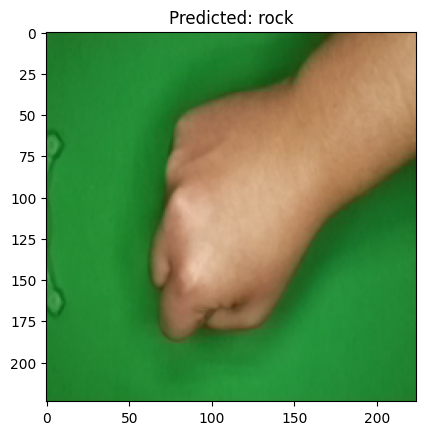

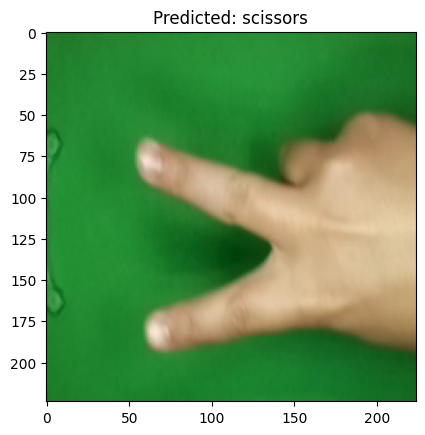

In [32]:
# Test the model on a few images
import numpy as np
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

# Assuming 'train_loader' is your DataLoader
dataiter = iter(val_loader)

# Correct way to iterate over DataLoader
try:
    images, labels = next(dataiter)
    # Process inputs and labels
except StopIteration:
    # Handle end of iterator
    pass



outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display the first 4 images with their predictions
for i in range(15,17):
    imshow(images[i].cpu(), f'Predicted: {dataset.classes[predicted[i]]}')
